[View in Colaboratory](https://colab.research.google.com/github/maryn728/aiq-hackthon/blob/master/keras_mnist_cnn.ipynb)

# MNIST with Keras (CNN)

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, height, width

(60000, 10000, 28, 28)

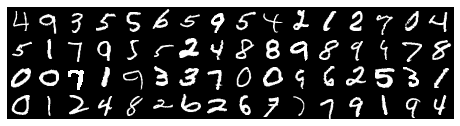

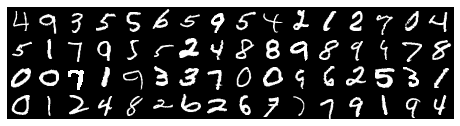

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

fig = plt.figure()
samples = np.concatenate(
          [np.concatenate([X_train[i].reshape(28,28) 
                           for i in [int(random.random() * len(X_train)) 
                                     for i in range(16)]], axis=1) 
           for i in range(4)], axis=0)
plt.imshow(samples, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
  
fig

First step, **preprocess** the data into the right shape

The training and test data need to be reshaped as (n, w, h, c) where n is the **number of samples**, w and h are the spatial dimensions (**width** and **height**) of the samples, and c is the number of **channels** (1 for our grayscale MNIST images, 3 for RGB images).

In [4]:
from keras.utils.np_utils import to_categorical


X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

# normalize from [0, 255] to [0, 1]
X_train /= 255
X_test /= 255

print(X_train.shape)

# numbers 0-9
n_classes = 10

# convert integer labels into one-hot vectors
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

(60000, 28, 28, 1)


The general architecture of a convolutional neural network is:

*   Convolution layers, followed by pooling layers
*   Fully-connected layers
*   A final fully-connected softmax layer

In [0]:
from keras.models import Sequential
model = Sequential()

# number of convolutional filters
n_filters = 32

# convolution filter size
# i.e. a n_conv x n_conv filter
n_conv = 3

# pooling window size
# i.e. a n_pool x n_pool pooling window
n_pool = 2

In [0]:
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model.add(Convolution2D(
        n_filters, 
        kernel_size=(n_conv, n_conv),
        # we have a 28x28 single channel (grayscale) image
        # so the input shape should be (28, 28, 1)
        input_shape=(height, width, 1)
))
model.add(Activation('relu'))

model.add(Convolution2D(n_filters, kernel_size=(n_conv, n_conv)))
model.add(Activation('relu'))

# then apply pooling to summarize the features extracted thus far
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))

In [0]:
from keras.layers import Dropout, Flatten, Dense

model.add(Dropout(0.25))

# flatten the data for the 1D layers
model.add(Flatten())

# Dense(n_outputs)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# the softmax output layer gives us a probablity for each class
model.add(Dense(n_classes))
model.add(Activation('softmax'))

print(model.summary())

Now we can compile the model

Categorical cross-entropy - the standard loss function for multiclass classification

Adam optimizer - adapts the learning rate based on how training is going and improves the training process

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [12]:
# how many examples to look at during each update step
batch_size = 128

# how many times to run through the full set of examples
n_epochs = 10

model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.2795 - acc: 0.9143 - val_loss: 0.0644 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0963 - acc: 0.9713 - val_loss: 0.0384 - val_acc: 0.9864
Epoch 3/10
57856/60000 [===========================>..] - ETA: 0s - loss: 0.0736 - acc: 0.9784

60000/60000 [==============================] - 7s 122us/step - loss: 0.0734 - acc: 0.9784 - val_loss: 0.0375 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0603 - acc: 0.9820 - val_loss: 0.0346 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.0332 - val_acc: 0.9888
Epoch 6/10
30464/60000 [==============>...............] - ETA: 3s - loss: 0.0469 - acc: 0.9858

60000/60000 [==============================] - 7s 121us/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0314 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0412 - acc: 0.9869 - val_loss: 0.0299 - val_acc: 0.9895
Epoch 8/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 9/10
25600/60000 [===========>..................] - ETA: 4s - loss: 0.0365 - acc: 0.9882

60000/60000 [==============================] - 7s 122us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.0324 - val_acc: 0.9898
Epoch 10/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0311 - acc: 0.9898 - val_loss: 0.0294 - val_acc: 0.9908


In [14]:
# so accuracy?
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print('loss:', loss)
print('accuracy:', accuracy)

loss: 0.02942497465276647
accuracy: 0.9908


To make a prediction on a single sample, the following code will reshape it into a batch of size 1, output the probability of each classes, and find the index of the maximum probability

In [17]:
x_sample = X_test[0].reshape(1,28,28,1)
y_prob = model.predict(x_sample)[0]
y_pred = y_prob.argmax()
y_actual = y_test[0].argmax()

print("probabilities: ", y_prob)
print("predicted = %d, actual = %d" % (y_pred, y_actual))

probabilities:  [1.4494579e-14 2.6066677e-11 1.3192815e-09 1.0086702e-07 1.0972859e-12
 4.7610085e-14 1.5871850e-18 9.9999988e-01 2.3905294e-12 1.0578976e-08]
predicted = 7, actual = 7
